# CUSTOMER SEGMENTATION

In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. <br>

**Data feature:**
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others


In [345]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Imputer 
from pylab import savefig
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### Input Data

In [346]:
Credit=pd.read_csv('germandata.csv')

In [347]:
Credit

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [348]:
Credit.shape

(1000, 10)

In [349]:
Credit1=Credit.drop(['Unnamed: 0'],axis=1)

### Missing Value Identification

In [350]:
count_missing=Credit1.isnull().sum().sort_values(ascending=False)
count_missing.head(10)

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
dtype: int64

Missing value detected in variabel saving accounts and checking account, we need to fix it with some methods

In [351]:
# Missing Value Persentation
print(' Missing Value Checking Account :', round(count_missing[0]/1000*100), '%')
print(' Missing Value Saving Account :', round(count_missing[1]/1000*100), '%')

 Missing Value Checking Account : 39.0 %
 Missing Value Saving Account : 18.0 %


we choose **mode** to impute missing value from the dataset

In [352]:
Credit1['Saving accounts'] = Credit1['Saving accounts'].fillna((Credit1['Saving accounts'].mode()[0]))
Credit1['Checking account'] = Credit1['Checking account'].fillna((Credit['Checking account'].mode()[0]))

After we impute the dataset using mode, make sure that there is no missing value in dataset

In [353]:
count_missing2=Credit1.isnull().sum().sort_values(ascending=False)
count_missing2.head(10)

Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
dtype: int64

#### Categorical and Numerical Data

Split data categorical and numerical to help explorating data and clustering with this data

In [354]:
numerik=['Credit amount','Duration','Age']
categorical=Credit1.drop(numerik,axis=1)
numerical=Credit1[numerik]
categorical.head()

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,male,2,own,little,little,radio/TV
1,female,2,own,little,moderate,radio/TV
2,male,1,own,little,little,education
3,male,2,free,little,little,furniture/equipment
4,male,2,free,little,little,car


Variabel in **Categorical** data  : <br>
1. Sex
2. Job
3. Housing
4. Saving accounts
5. Checking account
6. Purpose

Variabel in **Numerical** data are : <br>
1. Credit amount
2. Duration
3. Age

### Correlation

#### Correlation Using Hitmap

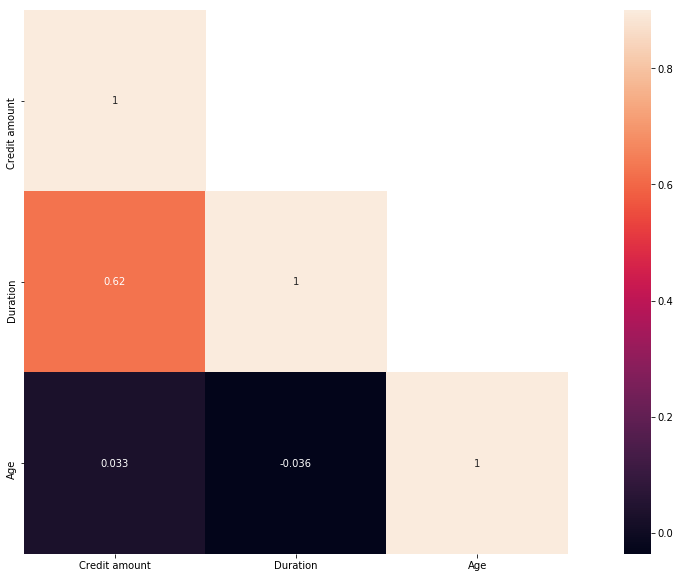

In [356]:
#create correlation with hitmap

#create correlation
corr = numerical.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

**Correlation Result : ** <br>

From hitmap using correlation pearson, the biggest correlation in numerical data is credit amount with duration with the result of correlation is 0,62. 

#### Change the Label of the Categorical Data to Numerical Data

In [ ]:
I choose to change the label of the categorical data to numerical using label encoder is to make my analysis become easier. 

In [357]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Credit_1=Credit1.copy()
Credit_1.Sex=le.fit_transform(Credit_1.Sex)
Credit_1.Housing=le.fit_transform(Credit_1.Housing)
Credit_1["Saving accounts"]=le.fit_transform(Credit_1["Saving accounts"])
Credit_1["Checking account"]=le.fit_transform(Credit_1["Checking account"])
Credit_1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,radio/TV
1,22,0,2,1,0,1,5951,48,radio/TV
2,49,1,1,1,0,0,2096,12,education
3,45,1,2,0,0,0,7882,42,furniture/equipment
4,53,1,2,0,0,0,4870,24,car


### Visualization

(-1.1178012272797704,
 1.1008476830493663,
 -1.1181212751136043,
 1.1160705319782984)

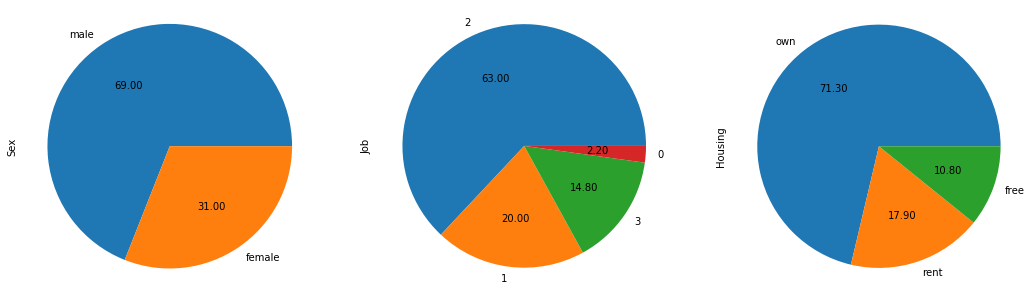

In [358]:
f=plt.figure(figsize=(18,5))
f.add_subplot(1,3,1)
Credit1["Sex"].value_counts().plot.pie(autopct = "%.2f")
plt.axis("equal")
f.add_subplot(1,3,2)
Credit1["Job"].value_counts().plot.pie(autopct = "%.2f")
plt.axis("equal")
f.add_subplot(1,3,3)
Credit1["Housing"].value_counts().plot.pie(autopct = "%.2f")
plt.axis("equal")

From data credit, 690 people are male and 310 are female. Most of the people are from skilled job (63%) and at least 2,20% are unskilled and non-resident. From the housing, we know that 71,30% people have their own house, 17,30% rent their house and 10,80% people have their house for free.

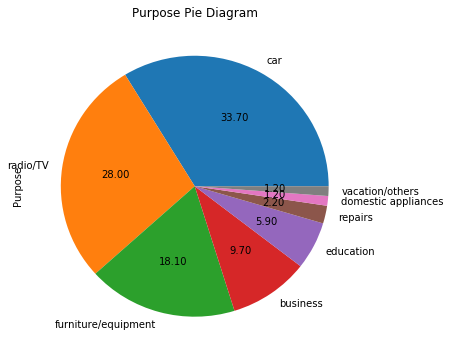

In [366]:
Credit1['Purpose'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Purpose Pie Diagram");

Most of people use the credit for **buy or rent** a car (33,7%). After car, 28% people use for radio/tv, 18,10% for furniture and the lowest credit for vacation/others.

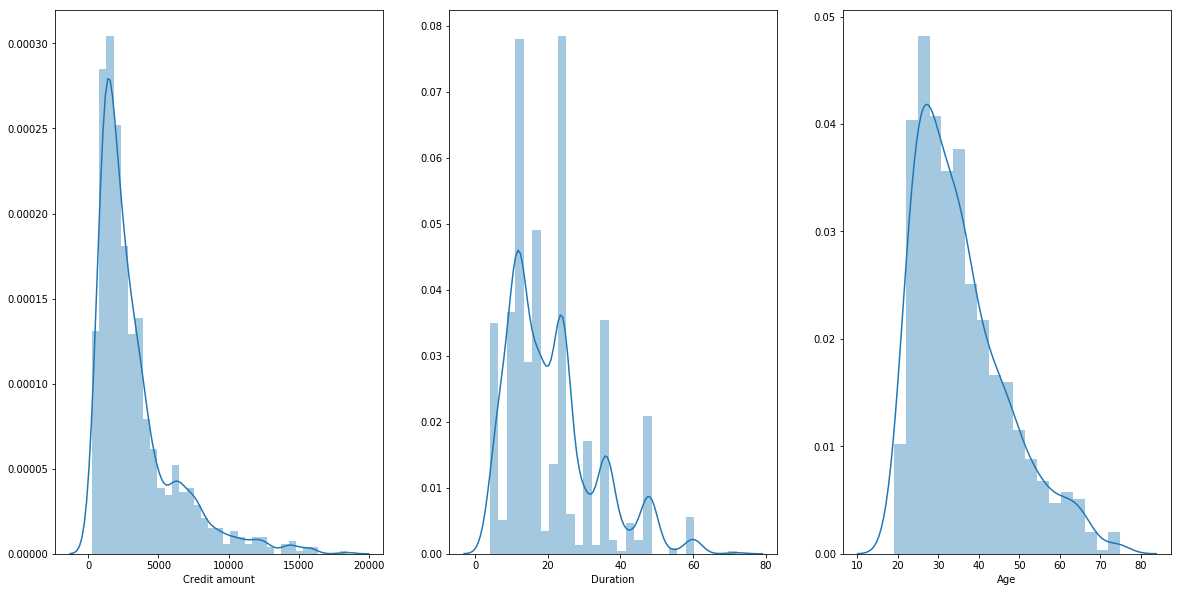

In [335]:
f=plt.figure(figsize=(20,10))
f.add_subplot(1,3,1)
sns.distplot(numerical['Credit amount'])
f.add_subplot(1,3,2)
sns.distplot(numerical['Duration'])
f.add_subplot(1,3,3)
sns.distplot(numerical['Age'])

From the distribution plot, we know that from credit amount and age, the distributon has **positive skewness and normal distribution**.

Text(0,40,'Frequency')

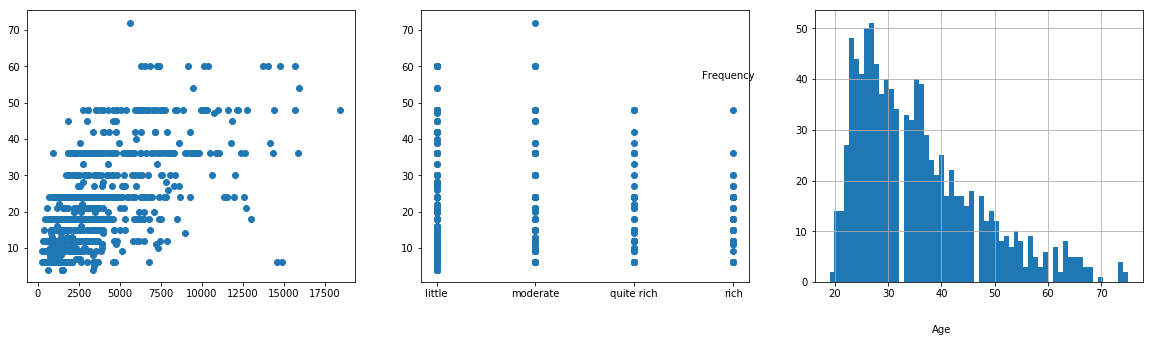

In [381]:
f=plt.figure(figsize=(20,5))
f.add_subplot(1,3,1)
plt.scatter(Credit1['Credit amount'],Credit1["Duration"])
f.add_subplot(1,3,2)
plt.scatter(Credit1['Saving accounts'],Credit1["Duration"])
f.add_subplot(1,3,3)
fig = Credit1.Age.hist(bins=60)
fig.text(40, -10, 'Age', ha='center')
fig.text(0, 40, 'Frequency', ha='center')

1. Short term credit with credit range 2000 t0 5000 yield maximum customer and profits.
2. People in type moderate are more have loans bigger than others.
3. People from Age 23 to 32 are the target customer because bigger than others.

**Credit Amount VS Age**

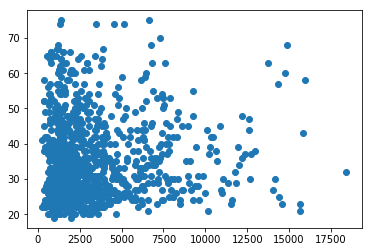

In [337]:
plt.scatter(Credit1['Credit amount'],Credit1["Age"])
plt.figure()

The most people in age 20-40 took loans between 0 until 5000. Furthermore, people in another age took loans in nominal variety.

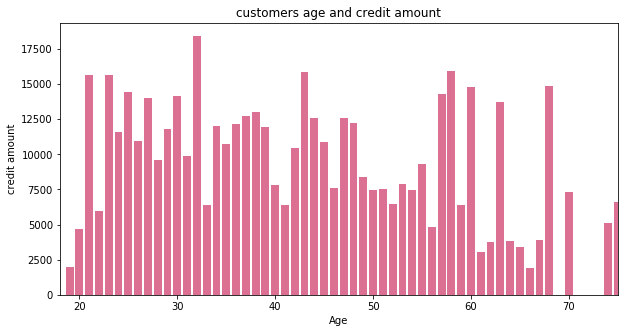

In [404]:
plt.figure(figsize=(10,5))
plt.bar(Credit1["Age"],Credit1["Credit amount"],color="palevioletred")
plt.xlabel("Age")
plt.ylabel("credit amount")
plt.xlim(18,75)
plt.title("customers age and credit amount")
plt.show()

Bar plot show that the biggest age who take the credit is from age 32 with 17500. The smallest age who take the credit is from age 66 with less than 2500

**Purpose VS Credit Amount**

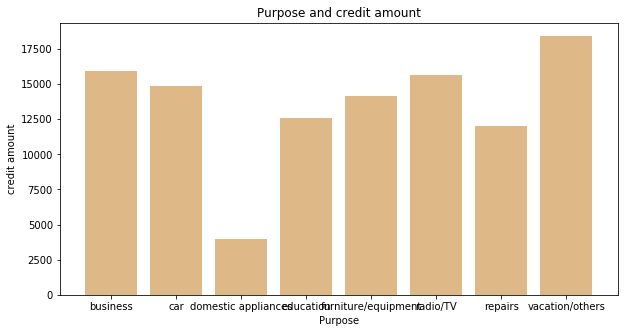

In [397]:
plt.figure(figsize=(10,5))
plt.bar(Credit1["Purpose"],Credit1["Credit amount"],color="burlywood")
plt.xlabel('Purpose')
plt.ylabel("credit amount")
plt.title("Purpose and credit amount")
plt.show()

**Count Plot Purpose VS Sex**

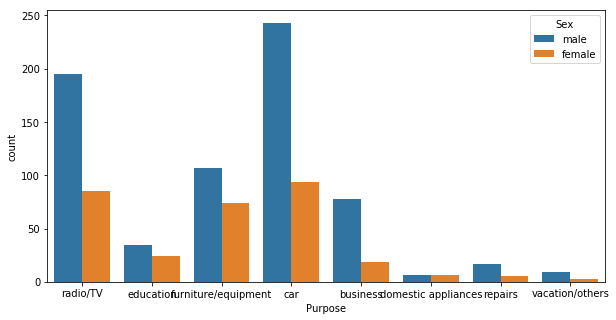

In [339]:
plt.figure(figsize=(10,5))
sns.countplot(x="Purpose",data=Credit1,hue="Sex")

Count plot shows distribution of loan purpose with Gender. All of the purpose show that **men took more car loans than women**. Women took the credit for cars too but not as much as a men took the loans. The lowest men and women tooks the credit for vacation.

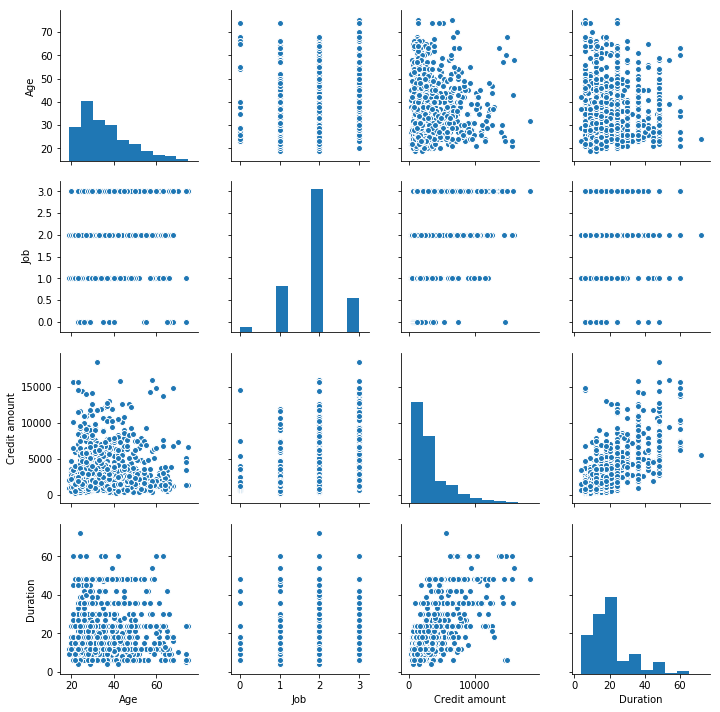

In [406]:
sns.pairplot(data = Credit1)
plt.show()

## Clustering Analysis

To know each person is classified as good, medium, or bad credit risks according, we'll do some analysis using clustering with 3 methods:<br>
1. K-Means Clustering
2. Hierarchical Clustering
3. DBScan Clustering

I used all of the feature to get the best cluster because i wanna know how cluster will created for all of the feature. Although, between all of the variabel have a difference value of corelation. Clustering using all of the feature is to know the best segmentation from each cluster.

In [391]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Credit12=Credit1.copy()
Credit12.Sex=le.fit_transform(Credit1.Sex)
Credit12.Housing=le.fit_transform(Credit1.Housing)
Credit12["Saving accounts"]=le.fit_transform(Credit1["Saving accounts"])
Credit12["Checking account"]=le.fit_transform(Credit1["Checking account"])

In [392]:
Credit12.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,radio/TV
1,22,0,2,1,0,1,5951,48,radio/TV
2,49,1,1,1,0,0,2096,12,education
3,45,1,2,0,0,0,7882,42,furniture/equipment
4,53,1,2,0,0,0,4870,24,car
5,35,1,1,0,0,0,9055,36,education
6,53,1,2,1,2,0,2835,24,furniture/equipment
7,35,1,3,2,0,1,6948,36,car
8,61,1,1,1,3,0,3059,12,radio/TV
9,28,1,3,1,0,1,5234,30,car


In [362]:
Credit123 = Credit12.copy()
Credit123.Job = Credit123.Job.astype(str)
dCredit123 = Credit123[[ 'Job','Sex','Age','Credit amount', 'Duration','Housing', 'Purpose']]
X1 = pd.get_dummies(Credit123)
X1.head()

,Age,Sex,Housing,Saving accounts,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,1,0,1169,6,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,0,1,0,5951,48,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,1,0,2096,12,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,1,0,0,7882,42,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,1,0,0,4870,24,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [363]:
#normalize
X=normalize(X1)
X

array([[0.05721918, 0.00085402, 0.00085402, ..., 0.00085402, 0.        ,
        0.        ],
       [0.00369671, 0.        , 0.00016803, ..., 0.00016803, 0.        ,
        0.        ],
       [0.02337108, 0.00047696, 0.00047696, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04720555, 0.00124225, 0.00124225, ..., 0.00124225, 0.        ,
        0.        ],
       [0.01246144, 0.0005418 , 0.        , ..., 0.0005418 , 0.        ,
        0.        ],
       [0.00589996, 0.00021852, 0.00021852, ..., 0.        , 0.        ,
        0.        ]])

### K-Means Clustering

In [200]:
from sklearn.cluster import KMeans

**1. Define K Value**

To get k value we can choose from :
1. Elbow Graph
2. Silhouette Methods

**Elbow**

Text(0.5,1,'Elbow curve')

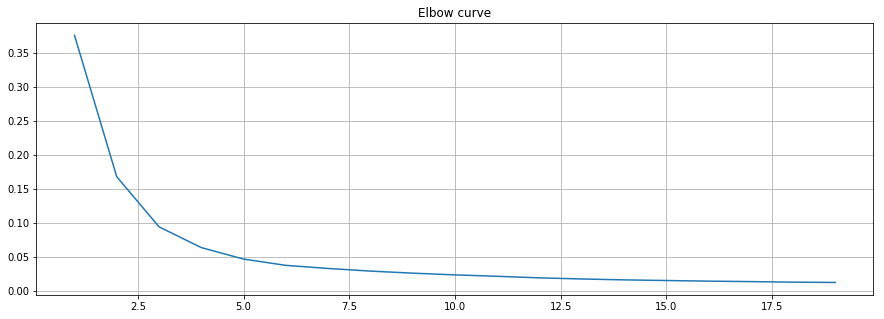

In [201]:
distorsions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1,20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

**Silhouette Methods**

In [202]:
range_n_clusters = [3, 4, 5]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X, labels)
    print(silhouette_avg)

0.5777341771132319
0.48907557358079223
0.4730822501115525


**K Value:**

Based on **Elbow Graph** obtained value of k is 3. This is based on the shape of the graph that starts to decline slowly and stably. This is also supported when viewed with the value of **Silhouette method**. The number of k is obtained from the highest value that is k = 3 with a value 0,578

**Clustering Using K-Means with k=3**

In [203]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [204]:
print(kmeans.cluster_centers_)

[[3.62260007e-02 6.32751983e-04 1.02763769e-03 4.15293203e-04
  9.99186262e-01 1.26638401e-02 4.18617258e-05 3.20011028e-04
  5.57369665e-04 5.17283816e-05 6.33660319e-04 2.45543972e-04
  9.17665092e-05 4.80328310e-05 3.06031181e-04 2.29466180e-05
  1.23376925e-04 9.22261608e-05 3.29670619e-04 3.99267912e-05
  8.75967481e-06]
 [1.13405264e-02 2.34989527e-04 4.11817594e-04 1.28594835e-04
  9.99886134e-01 7.08911518e-03 5.26067009e-06 6.19877049e-05
  2.43395109e-04 4.74598607e-05 2.39780521e-04 9.64948863e-05
  2.18279375e-05 3.71920381e-05 1.05684371e-04 3.94697881e-06
  1.50852152e-05 8.14638332e-05 1.06171028e-04 6.89304145e-06
  1.66683896e-06]
 [9.79895458e-02 1.16592376e-03 2.25389216e-03 1.52460983e-03
  9.94553594e-01 1.99238916e-02 5.93299439e-05 9.45656907e-04
  1.05832415e-03 1.35525272e-20 1.50713125e-03 4.07891617e-04
  1.48288134e-04 1.35525272e-20 7.67890096e-04 1.16238803e-04
  1.16893622e-04 9.28414165e-05 9.69447061e-04 3.38813179e-21
  1.27054942e-21]]


In [205]:
print(kmeans.labels_)

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 2 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 0 1 1 1 1 1 1 1 0 1 2 1 1 0 1 1 1 1 1 0 2
 1 0 0 1 1 1 1 1 0 2 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 2 1 2 1 1 0 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 2 0 1 0 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1
 1 0 1 1 2 1 0 0 1 1 1 0 1 2 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0
 1 0 1 1 0 0 1 0 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 

In [206]:
Credit_final=Credit1.copy()

In [207]:
Credit_final['K-means Clustering']=kmeans.labels_

#### Cluster Result:

In [208]:
Credit_final.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,K-means Clustering
0,67,male,2,own,little,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,1


**Principal Component Analysis (PCA)**

PCA is used to visualization the result from K-Means clustering. I use PCA because in this part, i used all of the features to creat a better cluster and PCA help me to create a visualization easily with create a new variabel from all of the features.

In [407]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [408]:
finalresult = pd.concat([principalDf, Credit_final], axis = 1)

In [409]:
pca.explained_variance_ratio_

array([0.94451989, 0.05033713, 0.00132904])

To know how much principle component created, we can get from the result of variance ratio explained. We can use two principle component because the result is almost 100%.

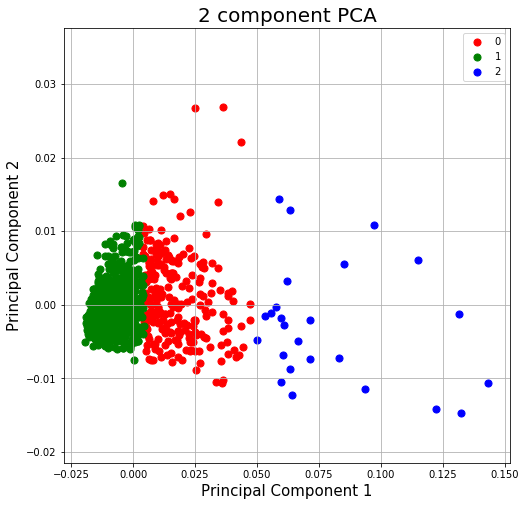

In [387]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalresult['K-means Clustering'] == target
    ax.scatter(finalresult.loc[indicesToKeep, 'principal component 1']
               , finalresult.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

**Visualization of centroid**

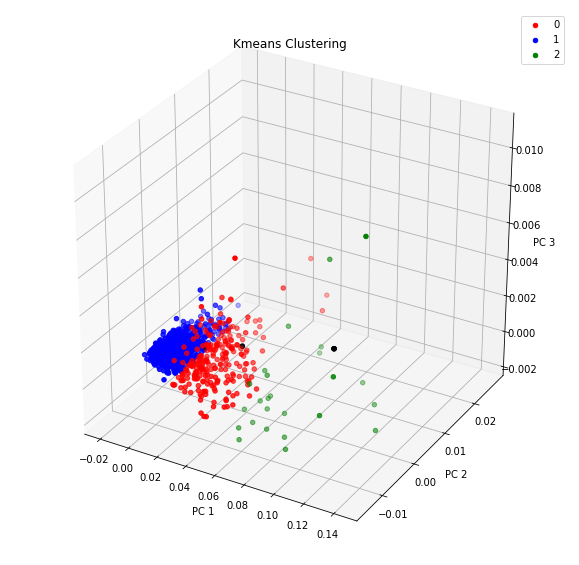

In [390]:
from mpl_toolkits.mplot3d import Axes3D
x = finalresult['principal component 1']
x1 = finalresult['principal component 2']
x2 = finalresult['principal component 3']
group= kmeans.labels_
color = ['red','blue','green']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.title("Kmeans Clustering")
plt.show()

#### Visualisasi :

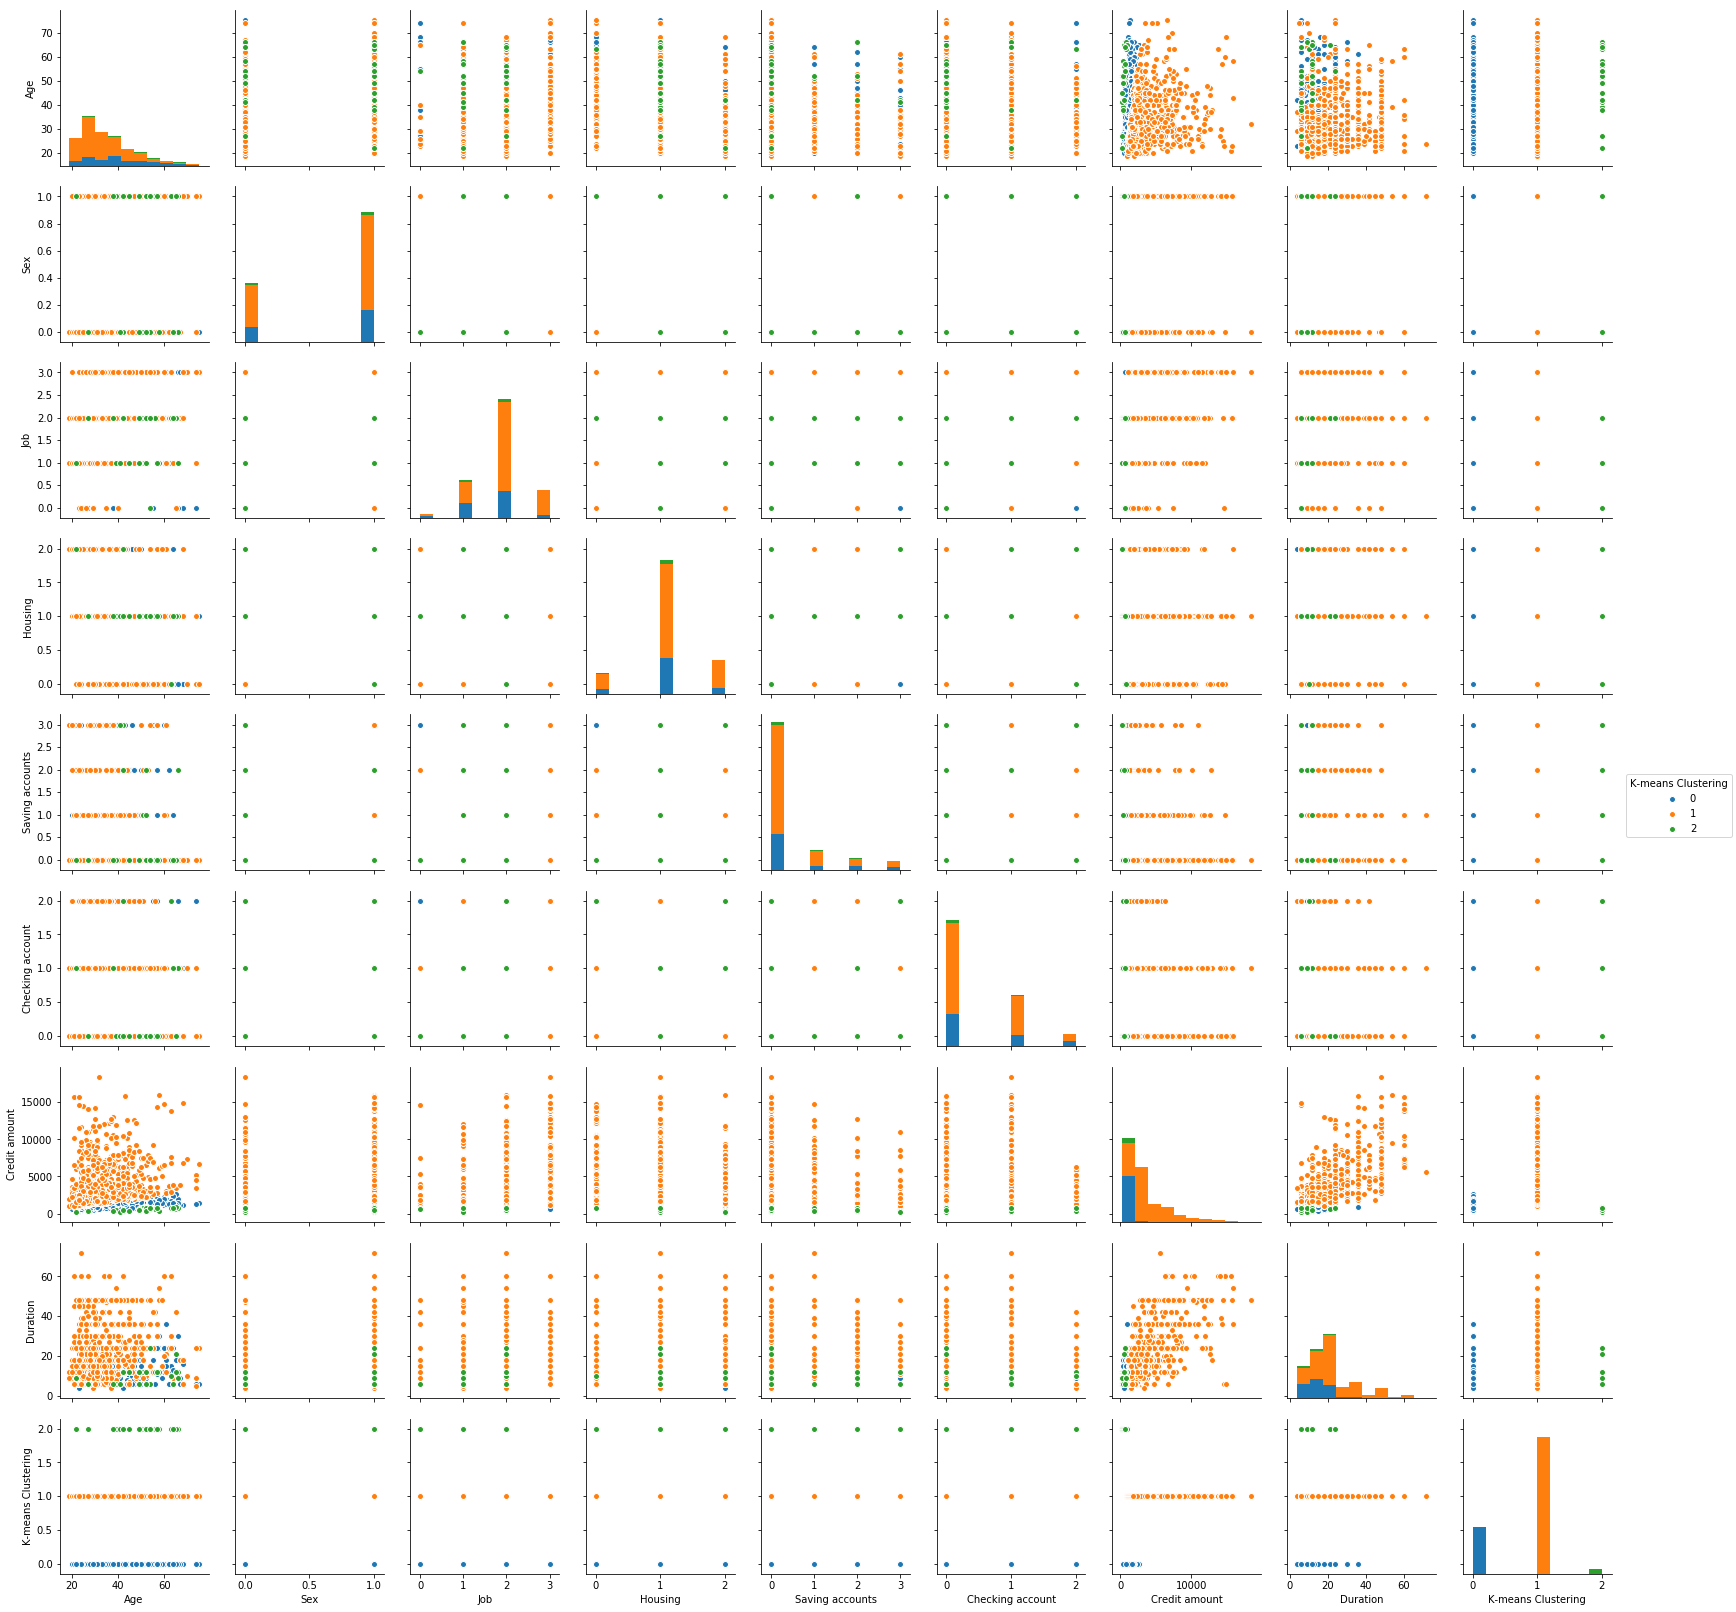

In [209]:
Credit_1['K-means Clustering']=kmeans.labels_
sns.pairplot(data =Credit_1,hue='K-means Clustering')
plt.show()

In [210]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

### Hierarchical Clustering

In this method, we can know how much cluster will be created with dendogram

In [211]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

**Define How Much Cluster Created from Dendogram**

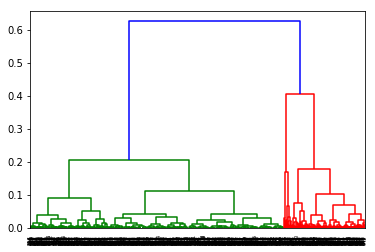

In [212]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

From the dendogram, we know that the cluster created from the dendogram is **3 cluster**

In [213]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2,

**Cluster Result:**

In [410]:
Credit_final['Hierarchical Clustering']=model.labels_
Credit_final.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,K-means Clustering,Hierarchical Clustering,DBScan Clustering
0,67,male,2,own,little,little,1169,6,radio/TV,0,1,-1
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,0,0
2,49,male,1,own,little,little,2096,12,education,1,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,0,0
4,53,male,2,free,little,little,4870,24,car,1,0,0


#### Visualization :

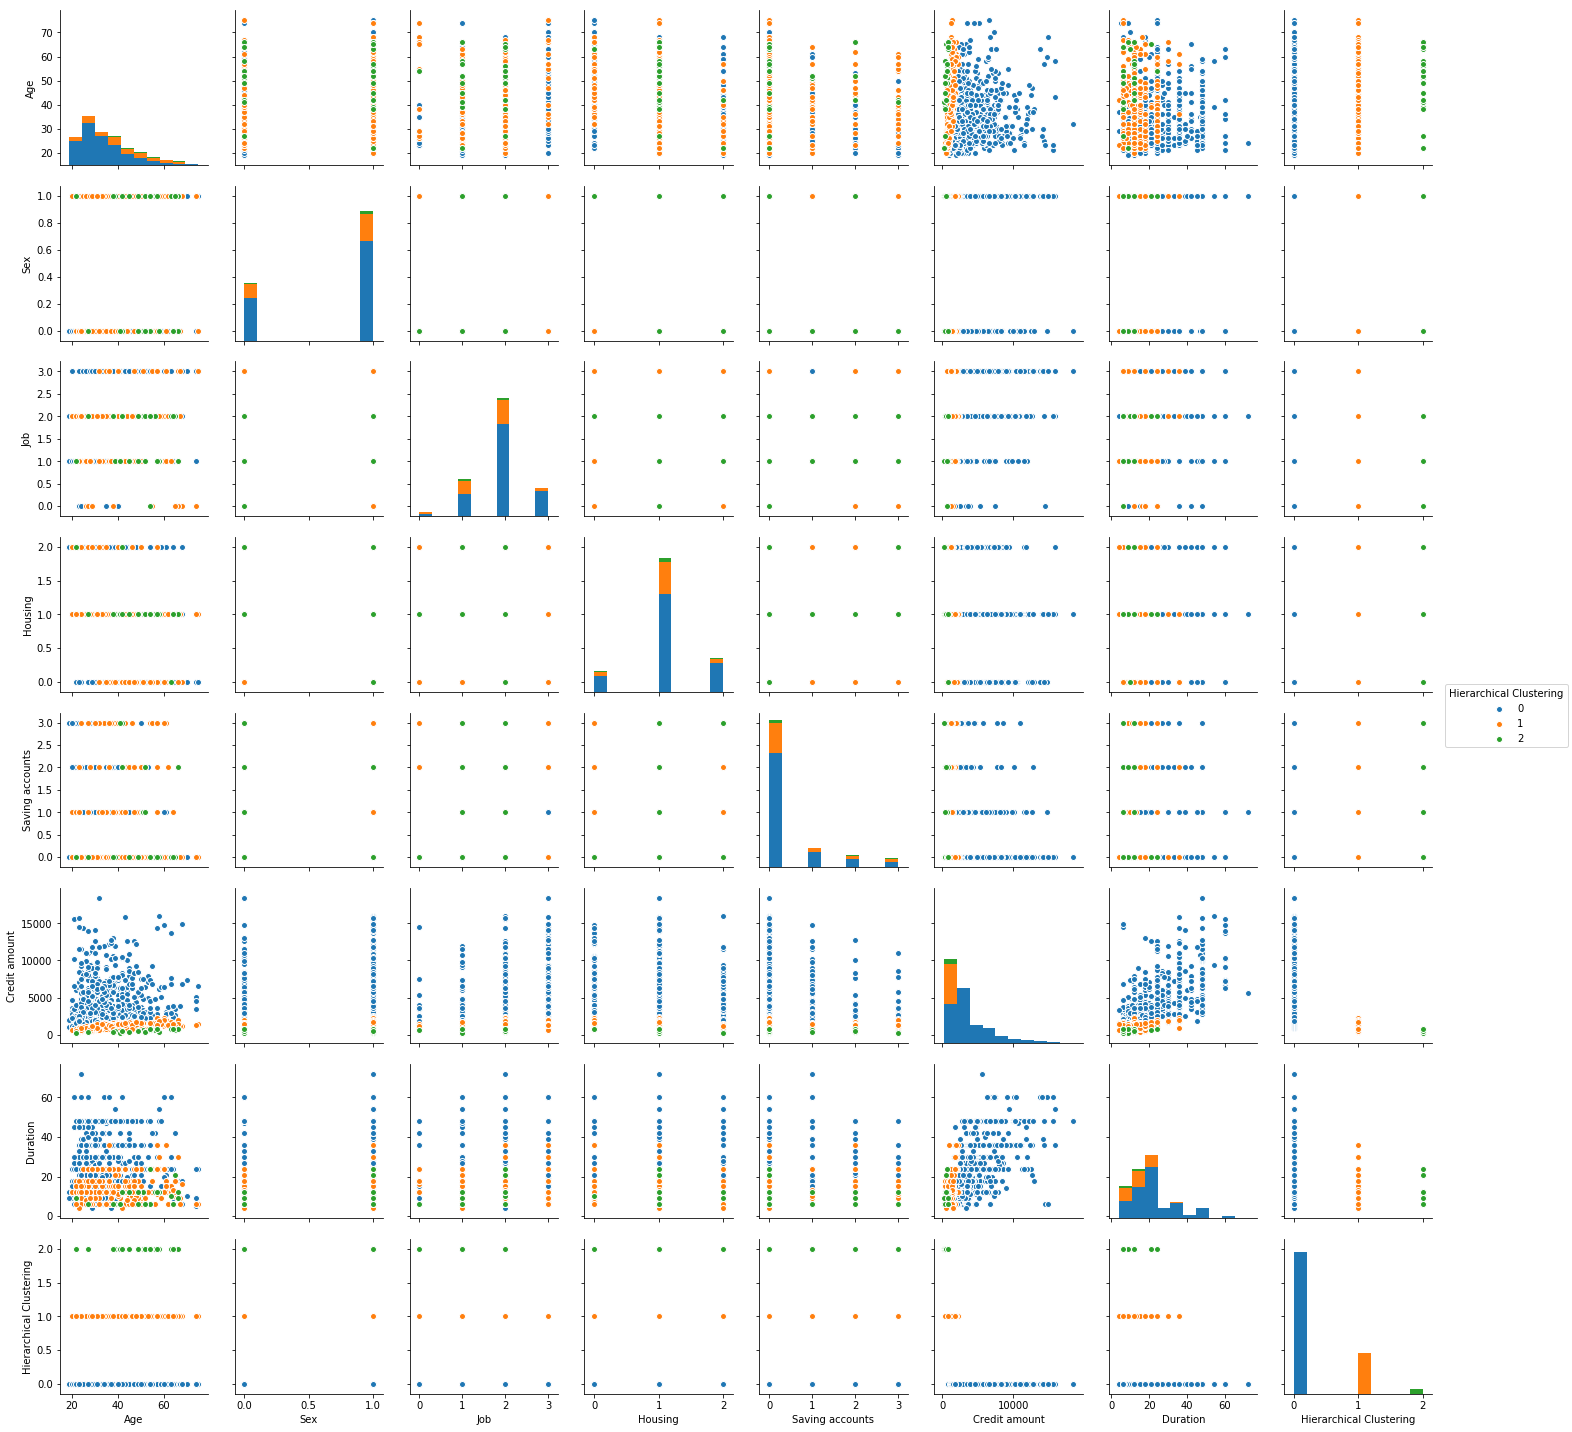

In [280]:
Credit_1['Hierarchical Clustering']=model.labels_
sns.pairplot(data =Credit_1,hue='Hierarchical Clustering')
plt.show()

### DBSCAN Clustering

In [215]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

In [304]:
dbscan = DBSCAN(eps=0.005,min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.005, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [305]:
print(dbscan.labels_)

[-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0 -1  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0

In [312]:
Credit_final['DBScan Clustering']=dbscan.labels_
Credit_final.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,K-means Clustering,Hierarchical Clustering,DBScan Clustering
0,67,male,2,own,little,little,1169,6,radio/TV,0,1,-1
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,0,0
2,49,male,1,own,little,little,2096,12,education,1,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,0,0
4,53,male,2,free,little,little,4870,24,car,1,0,0
5,35,male,1,free,little,little,9055,36,education,1,0,0
6,53,male,2,own,quite rich,little,2835,24,furniture/equipment,1,0,0
7,35,male,3,rent,little,moderate,6948,36,car,1,0,0
8,61,male,1,own,rich,little,3059,12,radio/TV,1,0,0
9,28,male,3,own,little,moderate,5234,30,car,1,0,0


**Visualization:**

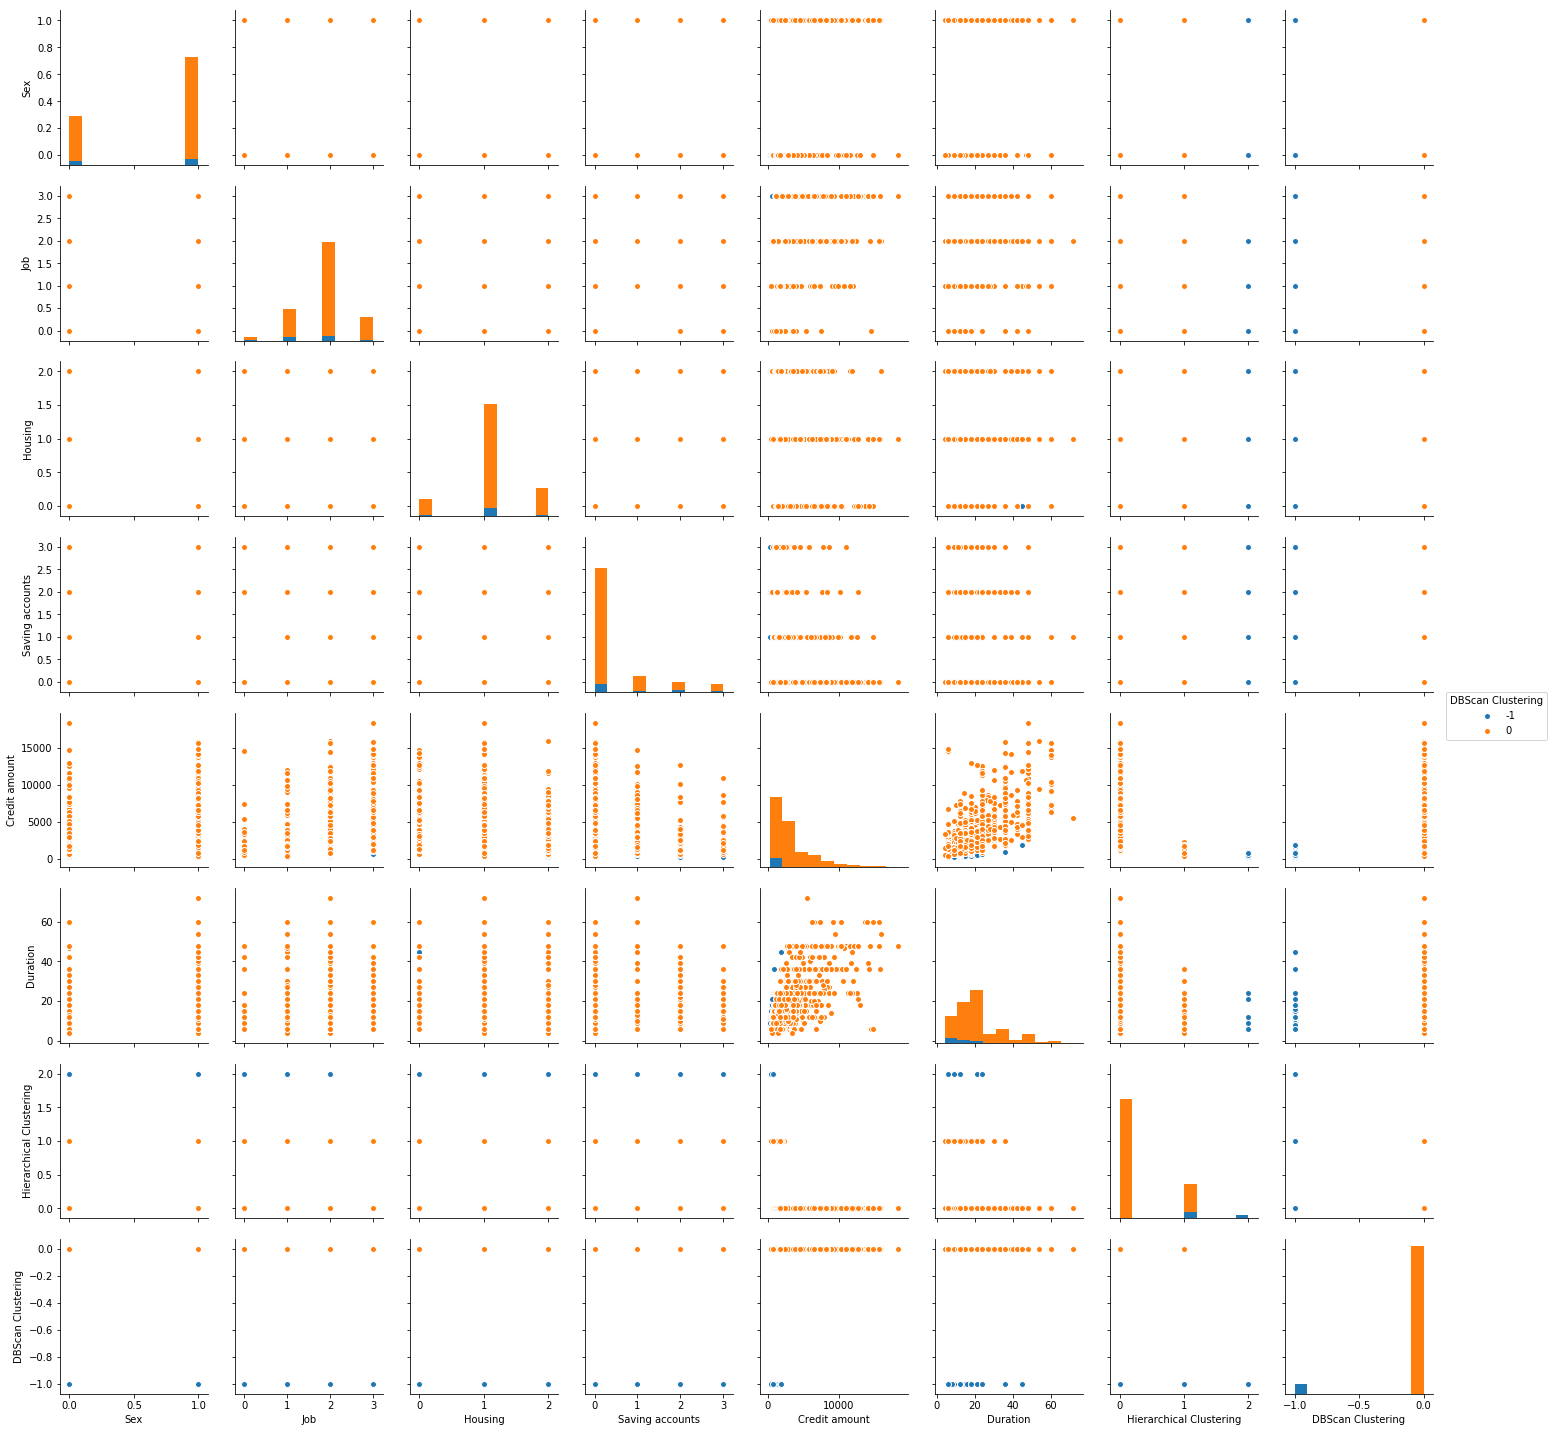

In [313]:
Credit_1['DBScan Clustering']=dbscan.labels_
sns.pairplot(data =Credit_1,hue='DBScan Clustering')
plt.show()

### CUSTOMER SEGMENTATION RESULT :

After we get the result from each clustering methods, the result is : <br>
**1. K-Means Clustering : 3 Clustering created** <br>
**2. Hierarchical Clustering : 3 Clustering created** <br>
**3. DBScan Clustering : 1 Clustering created with noise** <br>


Then, from the result, **the best methods is K-Means and Hierarchical** because the cluster's result is same. 

**From pair plot in K-Means and Hierarchical Clustering** <br>
We can know that the result is similar with the feature who has a big correlation. From plot in each feature, we get the result that the feature who has a group pattern is duration and credit amount. In credit amount and duration, there're three group created with different color who can describe a segmentation. <br>
**1. Cluster 1: High Risk** <br>
     In this cluster, the color of the group is green. It means that they have a big credit amount, from a skilled job, and have their own houses with long duration of credit. <br>
**2. Cluster 2: Medium Risk** <br>
     In this cluster, the color of the group is orange with the most credit taker. They have duration and credit amount in the middle. <br>
**3. Cluster 3: Low Risk** <br>
         In this cluster, the color of the group is blue. They have a small credit amount, from a skilled job, have their own houses with a short duration of credit. <br>

From the result of cluster, we know that : <br>
1. Cluster 1 : bad <br>
2. Cluster 2 : medium <br>
3. Cluster 3 : good <br>

We can give each cluster with different treatments:<br>
**For the good cluster :**<br>
Company can give them a lot of program to make them take another credit with low risk. <br>
**For the medium cluster :** <br>
Company can give them the credit program with a small risk to make them take with another credit but can make the duration is faster than before and credit amount is bigger than before. <br>
**For the bad cluster :** <br>
Company can monitoring their transaction to make sure that they can pay on time based on target.